#### Actividad 1: 

Obtener una primera visión general de la estructura y el contenido de tus datos, utilizando .info().¿Son los tipos de datos (Dtype) apropiados para cada columna?

In [16]:
import pandas as pd

df = pd.read_excel('../data/empleados_sesion12.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmpleadoID       20 non-null     int64 
 1   Departamento     20 non-null     object
 2   AñosExperiencia  20 non-null     int64 
 3   SalarioAnual     20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


In [17]:
print("Análisis de tipos de datos:")
print("-" * 70)
print("--> EmpleadoID (int64): Apropiado, es un identificador numérico")
print("--> Departamento (object): Apropiado, es un texto categórico")
print("--> AñosExperiencia (int64): Apropiado, es un valor numérico entero")
print("--> SalarioAnual (int64): Apropiado, es un valor numérico entero")
print("\nConclusión: Los tipos de datos son apropiados para cada columna.")
print("\nRecomendación: 'Departamento' podría convertirse a tipo 'category'")
print("para optimizar memoria si el dataset fuera más grande.")

Análisis de tipos de datos:
----------------------------------------------------------------------
--> EmpleadoID (int64): Apropiado, es un identificador numérico
--> Departamento (object): Apropiado, es un texto categórico
--> AñosExperiencia (int64): Apropiado, es un valor numérico entero
--> SalarioAnual (int64): Apropiado, es un valor numérico entero

Conclusión: Los tipos de datos son apropiados para cada columna.

Recomendación: 'Departamento' podría convertirse a tipo 'category'
para optimizar memoria si el dataset fuera más grande.


#### Actividad 2: 

Calcular las estadísticas descriptivas básicas para todas las columnas numéricas.

In [18]:
df.describe()

,EmpleadoID,AñosExperiencia,SalarioAnual
count,20.00000,20.00000,20.000000
mean,10.50000,6.55000,83400.000000
std,5.91608,4.80652,48562.927164
min,1.00000,1.00000,25000.000000
25%,5.75000,3.00000,51500.000000
50%,10.50000,5.50000,76500.000000
75%,15.25000,8.25000,97500.000000
max,20.00000,22.00000,250000.000000


#### Actividad 3: 

Calcular la media, mediana y moda para entender el "centro" de la distribución de salarios. Cuál de los dos valores es mayor? Basado en lo que aprendiste sobre cómo los outliers afectan a estas medidas, ¿qué sospechas que está ocurriendo con los datos de salarios que causa esta diferencia?

In [19]:
media = df['SalarioAnual'].mean()
mediana = df['SalarioAnual'].median()
moda = df['SalarioAnual'].mode()

print(f"Media: ${media}")
print(f"Mediana: ${mediana}")
print(f"Moda: \n{moda}")
print("\nEn la moda se encuentran 20 valores debido a que todos esos valores tienen una frecuencia igual a 1.")
print(f"La media (${media}) es mayor que la mediana (${mediana})")
print("Se puede observar la presencia de outliers (valores atípicos o aberrantes) que están elevando el promedio, ")
print("mientras que la mediana no se ve afectada por estos valores extremos.")

Media: $83400.0
Mediana: $76500.0
Moda: 
0      25000
1      40000
2      45000
3      48000
4      50000
5      52000
6      55000
7      58000
8      70000
9      75000
10     78000
11     80000
12     85000
13     92000
14     95000
15    105000
16    115000
17    120000
18    130000
19    250000
Name: SalarioAnual, dtype: int64

En la moda se encuentran 20 valores debido a que todos esos valores tienen una frecuencia igual a 1.
La media ($83400.0) es mayor que la mediana ($76500.0)
Se puede observar la presencia de outliers (valores atípicos o aberrantes) que están elevando el promedio, 
mientras que la mediana no se ve afectada por estos valores extremos.


#### Actividad 4: 

Utilizar un gráfico para identificar visualmente la presencia de valores atípicos en los salarios. ¿Cuántos puntos aparecen fuera de los "bigotes" del diagrama? ¿Qué crees que representan esos puntos en el contexto de los salarios de la empresa?

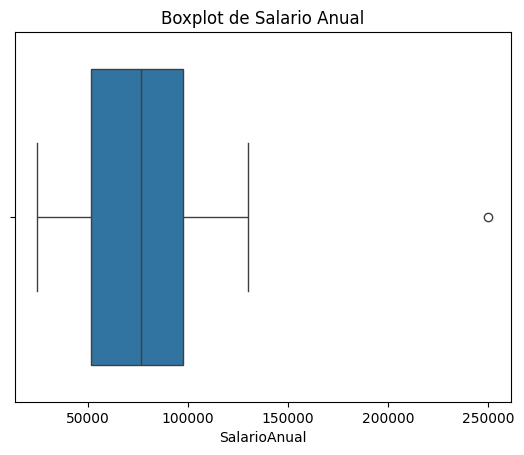

Análisis del boxplot de Salario Anual:
------------------------------------------------------------------------------------------
En el gráfico se puede observar un punto fuera del bigote en el extremo derecho,
lo que indica la presencia de un outlier en los datos de salario anual.

Valor del outlier aproximado: $250,000
Este outlier representa a un empleado con un salario significativamente más alto que el resto.
Problemas al tener este outlier:
- Elevar la media del salario general anual.
- Distorsiona la percepción de la estructura salarial normal.
- Puede afectar decisiones de compensación y contratación.


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='SalarioAnual')
plt.title('Boxplot de Salario Anual')
plt.show()

print("Análisis del boxplot de Salario Anual:")
print("-" * 90)
print("En el gráfico se puede observar un punto fuera del bigote en el extremo derecho,")
print("lo que indica la presencia de un outlier en los datos de salario anual.")
print("\nValor del outlier aproximado: $250,000")
print("Este outlier representa a un empleado con un salario significativamente más alto que el resto.")
print("Problemas al tener este outlier:")
print("- Elevar la media del salario general anual.")
print("- Distorsiona la percepción de la estructura salarial normal.")
print("- Puede afectar decisiones de compensación y contratación.")

#### Actividad 5: 

Confirmar matemáticamente la presencia de outliers usando el método del Rango Intercuartílico (IQR).

In [21]:
Q1 = df['SalarioAnual'].quantile(0.25)
Q3 = df['SalarioAnual'].quantile(0.75)
IQR = Q3 - Q1 # Representa el 50% central de los datos

# Límites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1 (Percentil 25): ${Q1}")
print(f"Q3 (Percentil 75): ${Q3}")
print(f"IQR (Rango Intercuartílico): ${IQR}")
print(f"\nLímite inferior: ${limite_inferior}")
print(f"Límite superior: ${limite_superior}")

# Identificar outliers
outliers = df[(df['SalarioAnual'] < limite_inferior) | (df['SalarioAnual'] > limite_superior)]
print(f"\nNúmero de outliers detectados: {len(outliers)}")
print("\nOutliers encontrados:")
outliers.head()

Q1 (Percentil 25): $51500.0
Q3 (Percentil 75): $97500.0
IQR (Rango Intercuartílico): $46000.0

Límite inferior: $-17500.0
Límite superior: $166500.0

Número de outliers detectados: 1

Outliers encontrados:


,EmpleadoID,Departamento,AñosExperiencia,SalarioAnual
12,13,Ventas,22,250000


#### Actividad 6: 

Crear un nuevo conjunto de datos sin los valores atípicos para poder realizar un análisis más representativo. ¿Crees que al quitar estos datos estamos perdiendo información valiosa o, por el contrario, estamos haciendo el análisis más justo y representativo de un empleado "típico" en la empresa.

In [22]:
df_clean = df[~df['SalarioAnual'].isin(outliers['SalarioAnual'])] # (~) Negar la condición para filtrar outliers
print("\nDataset limpio de outliers:")
print(df_clean.describe())

print("-" * 90)
print("Al eliminar los outliers, estamos haciendo el análisis más ajustado y representativo.")
print("No estamos perdiendo información valiosa, ya que:")
print("- Se mantiene el dataset original para consultas específicas.")
print("- Podemos analizar los outliers por separado si es necesario.")


Dataset limpio de outliers:
       EmpleadoID  AñosExperiencia   SalarioAnual
count   19.000000        19.000000      19.000000
mean    10.368421         5.736842   74631.578947
std      6.048053         3.229071   29432.050796
min      1.000000         1.000000   25000.000000
25%      5.500000         3.000000   51000.000000
50%     10.000000         5.000000   75000.000000
75%     15.500000         8.000000   93500.000000
max     20.000000        12.000000  130000.000000
------------------------------------------------------------------------------------------
Al eliminar los outliers, estamos haciendo el análisis más ajustado y representativo.
No estamos perdiendo información valiosa, ya que:
- Se mantiene el dataset original para consultas específicas.
- Podemos analizar los outliers por separado si es necesario.


#### Actividad 7: 

Observa la mean (media) y la std (desviación estándar) del salario antes y después de eliminar los outliers. ¿Cómo cambiaron? ¿Por qué crees que este cambio es tan importante para un analista de datos antes de presentar sus conclusiones?

In [23]:
print("\nComparación de estadísticas:")
print("-" * 90)
print("---Media---")
media_antes = df['SalarioAnual'].mean()
media_despues = df_clean['SalarioAnual'].mean()
print(f"Media antes: {media_antes}")
print(f"Media después: {media_despues}")

print("\n---Mediana---")
mediana_antes = df['SalarioAnual'].median()
mediana_despues = df_clean['SalarioAnual'].median()
print(f"Mediana antes: {mediana_antes}")
print(f"Mediana después: {mediana_despues}")

print("\n---Desviación Estándar---")
std_antes = df['SalarioAnual'].std()
std_despues = df_clean['SalarioAnual'].std()
print(f"Desviación estándar antes: {std_antes}")
print(f"Desviación estándar después: {std_despues}")


Comparación de estadísticas:
------------------------------------------------------------------------------------------
---Media---
Media antes: 83400.0
Media después: 74631.57894736843

---Mediana---
Mediana antes: 76500.0
Mediana después: 75000.0

---Desviación Estándar---
Desviación estándar antes: 48562.92716400899
Desviación estándar después: 29432.05079560525


In [24]:
print("\nAnálisis de los cambios:")
print("-" * 90)
print(f"1. La media disminuyó de ${media_antes.round(2)} a ${media_despues.round(2)} (diferencia: ${(media_antes - media_despues).round(2)})")
print(f"   - La media se acerca más a la mediana (${mediana_despues.round(2)})")
print(f"   - Esto indica una distribución más simétrica y representativa del salario típico")

print(f"\n2. La desviación estándar disminuyó de ${std_antes.round(2)} a ${std_despues.round(2)} (diferencia: ${(std_antes - std_despues).round(2)})")
print(f"   - Reducción de ${(std_antes - std_despues).round(2)} en la variabilidad")
print(f"   - Los salarios ahora están más concentrados alrededor de la media")

print("\n3. Importancia para un analista de datos:")
print("   - Evita conclusiones sesgadas (la media original se dispersó por el outlier)")
print("   - Decisiones más justas (políticas salariales basadas en datos representativos)")
print("   - Información más precisa y confiable")
print("   - Predicciones más exactas")


Análisis de los cambios:
------------------------------------------------------------------------------------------
1. La media disminuyó de $83400.0 a $74631.58 (diferencia: $8768.42)
   - La media se acerca más a la mediana ($75000.0)
   - Esto indica una distribución más simétrica y representativa del salario típico

2. La desviación estándar disminuyó de $48562.93 a $29432.05 (diferencia: $19130.88)
   - Reducción de $19130.88 en la variabilidad
   - Los salarios ahora están más concentrados alrededor de la media

3. Importancia para un analista de datos:
   - Evita conclusiones sesgadas (la media original se dispersó por el outlier)
   - Decisiones más justas (políticas salariales basadas en datos representativos)
   - Información más precisa y confiable
   - Predicciones más exactas


#### Actividad 8: 

Análisis por Departamento. Explorar si la variabilidad de salarios se comporta de manera diferente entre departamentos. Observa los boxplots para cada departamento ¿Qué nos está presentando estos estos gráficos?

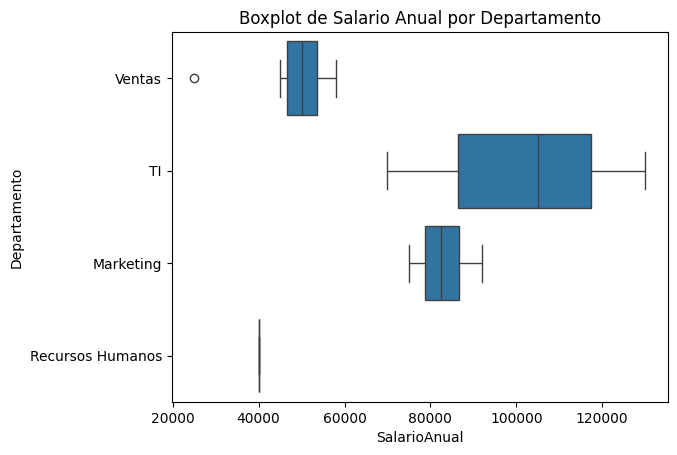

Análisis del boxplot de Salario Anual por Departamento:
----------------------------------------------------------------------

Recursos Humanos:
   • Distribución compacta y homogénea (entre $40K-$50K)
   • Sin outliers, Baja variabilidad

Marketing:
   • Salarios moderados (entre $70K-$90K)
   • Sin outliers, Variabilidad media

TI:
   • Salarios más altos (entre $80K-$130K)
   • Mayor dispersión, Alta variabilidad por especialización

Ventas:
   • 1 outlier: inferior (entre $25K)
   • El outlier superior distorsiona la distribución general
   • Mediana concentrada pero valores extremos

Conclusión:
   La variabilidad salarial es diferente entre departamentos.
   TI tiene mayor dispersión natural; Ventas tiene outliers extremos.


In [25]:
sns.boxplot(data=df_clean, x='SalarioAnual', y='Departamento')
plt.title('Boxplot de Salario Anual por Departamento')
plt.show()

print("Análisis del boxplot de Salario Anual por Departamento:")
print("-" * 70)

print("\nRecursos Humanos:")
print("   • Distribución compacta y homogénea (entre $40K-$50K)")
print("   • Sin outliers, Baja variabilidad")

print("\nMarketing:")
print("   • Salarios moderados (entre $70K-$90K)")
print("   • Sin outliers, Variabilidad media")

print("\nTI:")
print("   • Salarios más altos (entre $80K-$130K)")
print("   • Mayor dispersión, Alta variabilidad por especialización")

print("\nVentas:")
print("   • 1 outlier: inferior (entre $25K)")
print("   • El outlier superior distorsiona la distribución general")
print("   • Mediana concentrada pero valores extremos")

print("\nConclusión:")
print("   La variabilidad salarial es diferente entre departamentos.")
print("   TI tiene mayor dispersión natural; Ventas tiene outliers extremos.")


#### Análisis Departamento de Ventas, outlier encontrado

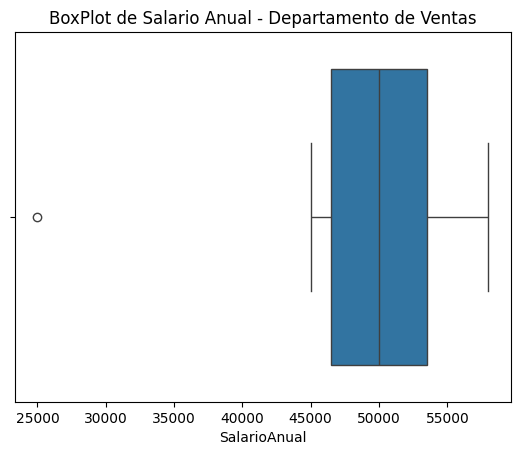

In [26]:
df_ventas = df_clean[df_clean['Departamento'] == 'Ventas'] # Filtrar departamento de ventas

sns.boxplot(data=df_ventas, x='SalarioAnual')
plt.title("BoxPlot de Salario Anual - Departamento de Ventas")
plt.show()

In [27]:
Q1 = df_ventas['SalarioAnual'].quantile(0.25)
Q3 = df_ventas['SalarioAnual'].quantile(0.75)
IQR = Q3 - Q1 # Representa el 50% central de los datos

# Límites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1 (Percentil 25): ${Q1}")
print(f"Q3 (Percentil 75): ${Q3}")
print(f"IQR (Rango Intercuartílico): ${IQR}")
print(f"\nLímite inferior: ${limite_inferior}")
print(f"Límite superior: ${limite_superior}")

# Identificar outliers
outliers_ventas = df_ventas[(df_ventas['SalarioAnual'] < limite_inferior) | (df_ventas['SalarioAnual'] > limite_superior)]
print(f"\nNúmero de outliers detectados: {len(outliers)}")
print("\nOutliers encontrados:")
outliers.head()

Q1 (Percentil 25): $46500.0
Q3 (Percentil 75): $53500.0
IQR (Rango Intercuartílico): $7000.0

Límite inferior: $36000.0
Límite superior: $64000.0

Número de outliers detectados: 1

Outliers encontrados:


,EmpleadoID,Departamento,AñosExperiencia,SalarioAnual
12,13,Ventas,22,250000


#### Proceso de limpieza completo:

**Fase 1 (Actividad 5-6):** Se eliminó el outlier global ($250K en Ventas) usando IQR global.

**Fase 2 (Actividad 8):** Al analizar por departamento, se detectó un outlier inferior en Ventas ($35K) que se eliminará a continuación.

**Resultado:** `df_clean` contendrá el dataset completamente limpio para análisis posteriores.

In [28]:
df_clean = df_clean[~df_clean['SalarioAnual'].isin(outliers_ventas['SalarioAnual'])] # Eliminar outliers del departamento de ventas

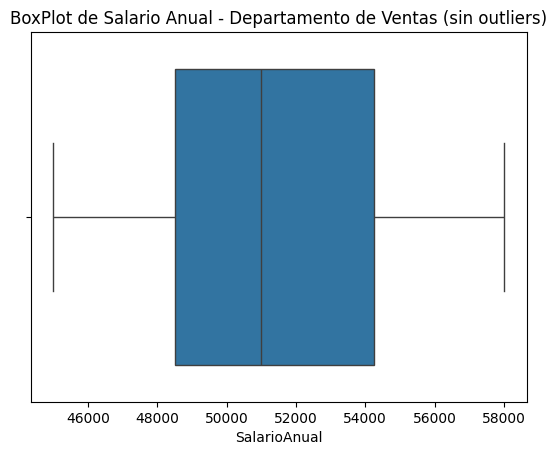

In [29]:
df_ventas_clean = df_ventas[~df_ventas['SalarioAnual'].isin(outliers_ventas['SalarioAnual'])]

# Gráfico boxplot limpio de outliers en Ventas
sns.boxplot(data=df_ventas_clean, x='SalarioAnual')
plt.title("BoxPlot de Salario Anual - Departamento de Ventas (sin outliers)")
plt.show()

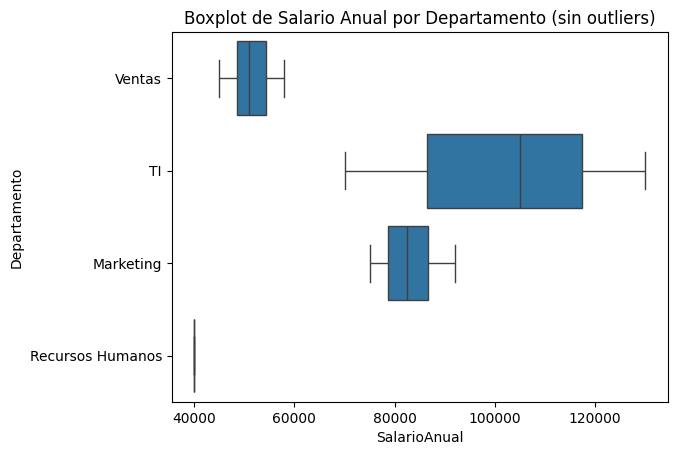

In [30]:
# Grafica de todos los departamentos sin outliers
sns.boxplot(data=df_clean, x='SalarioAnual', y='Departamento')
plt.title('Boxplot de Salario Anual por Departamento (sin outliers)')
plt.show()
